In [4]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score as CVS, train_test_split
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import datetime
import lightgbm as lgb
from lightgbm import LGBMClassifier
from collections import Counter

# Load data

In [27]:
accident=pd.read_csv('D:/Thesis/UK/UK/UK_2015-2019_with-nan.csv',index_col=0,dtype={'Accident_Index': 'str'})
pd.set_option('display.max_columns', 1000)

In [28]:
accident

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Year,Month,Day,Day_of_year,Hour,Minute_of_day
0,201597UA71710,2,1,1,2.0,75.0,10.0,3,0.0,0.0,0.0,0.0,9.0,3.0,NaN,-4.642617,55.646895,3,2,1,2015-10-27,3,13:00:00,4,785,6.0,60.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,2.0,75.0,10.0,1992.0,2.0,7.0,NaN,3.0,NaN,2015,10,27,300,13,780.0
1,201597UA71810,2,1,2,2.0,63.0,9.0,2,0.0,0.0,0.0,4.0,11.0,3.0,NaN,-4.864141,55.731777,2,3,10,2015-10-31,7,10:00:00,3,78,6.0,60.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,11.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,60.0,9.0,6871.0,2.0,7.0,NaN,3.0,NaN,2015,10,31,304,10,600.0
2,201597UA71810,2,2,2,2.0,75.0,10.0,2,0.0,0.0,0.0,4.0,11.0,1.0,NaN,-4.864141,55.731777,2,3,10,2015-10-31,7,10:00:00,3,78,6.0,60.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,11.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,60.0,9.0,6871.0,2.0,7.0,NaN,3.0,NaN,2015,10,31,304,10,600.0
3,201597UA71810,2,3,2,1.0,78.0,11.0,2,0.0,0.0,0.0,4.0,11.0,1.0,NaN,-4.864141,55.731777,2,3,10,2015-10-31,7,10:00:00,3,78,6.0,60.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,11.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,60.0,9.0,6871.0,2.0,7.0,NaN,3.0,NaN,2015,10,31,304,10,600.0
4,201597UA71810,2,4,2,1.0,67.0,10.0,2,0.0,0.0,0.0,4.0,11.0,1.0,NaN,-4.864141,55.731777,2,3,10,2015-10-31,7,10:00:00,3,78,6.0,60.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,11.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,60.0,9.0,6871.0,2.0,7.0,NaN,3.0,NaN,2015,10,31,304,10,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832453,2019984106919,1,1,1,1.0,24.0,5.0,3,0.0,0.0,0.0,0.0,19.0,3.0,6.0,-3.368899,55.047323,3,1,1,2019-05-18,7,01:00:00,4,725,6.0,60.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,19.0,0.0,17.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,24.0,5.0,1997.0,2.0,14.0,6.0,3.0,6.0,2019,5,18,138,1,60.0
832454,2019984107019,1,1,1,1.0,22.0,5.0,3,0.0,0.0,0.0,0.0,19.0,1.0,1.0,-2.983499,55.215407,3,4,1,2019-05-30,5,08:46:00,3,7,6.0,60.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,19.0,4.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,22.0,5.0,2143.0,2.0,1.0,1.0,1.0,1.0,2019,5,30,150,8,526.0
832455,2019984107219,2,1,1,1.0,61.0,9.0,3,0.0,0.0,0.0,0.0,9.0,3.0,7.0,-3.274645,54.991685,3,2,1,2019-06-21,6,15:30:00,4,723,6.0,60.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,9.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,61.0,9.0,2967.0,2.0,5.0,7.0,3.0,7.0,2019,6,21,172,15,930.0
832456,2019984107419,1,1,3,1.0,54.0,8.0,3,5.0,3.0,0.0,0.0,0.0,3.0,8.0,-2.997491,55.148292,3,1,1,2019-06-29,7,14:10:00,6,710,6.0,30.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,9.0,0.0,7.0,0.0,6.0,0.0,0.0,3.0,0.0,3.0,1.0,5.0,1.0,78.0,11.0,1597.0,2.0,6.0,8.0,3.0,8.0,2019,6,29,180,14,850.0


In [29]:
Counter(accident.Casualty_Severity)

Counter({3: 702265, 2: 121366, 1: 8827})

In [30]:
accident.drop(['Vehicle_Reference','Casualty_Reference','Longitude','Latitude','Date','Time','1st_Road_Number','Accident_Index','Day_of_year','Minute_of_day'],inplace=True,axis=1)

In [31]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(accident['Accident_Index'])
# accident['Accident_Index'] = le.transform(accident['Accident_Index'])

# Binary Classification -- Serious/Fatal or not?

In [32]:
accident['Serious_Fatal'] = 0
accident.loc[accident['Casualty_Severity'] < 3, 'Serious_Fatal'] = 1
accident['Serious_Fatal'].value_counts()

0    702265
1    130193
Name: Serious_Fatal, dtype: int64

In [33]:
385494/5

77098.8

In [34]:
X=accident.drop(['Casualty_Severity','Accident_Severity','Serious_Fatal'],axis=1)
y=accident.Serious_Fatal
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.30, random_state=710)

In [35]:
np.array_split

<function numpy.array_split(ary, indices_or_sections, axis=0)>

In [36]:
accident.columns

Index(['Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Casualty_Type', 'Casualty_Home_Area_Type', 'Casualty_IMD_Decile',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', '1st_Road_Class', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Carriageway_Hazards', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
     

In [37]:
#Speed_limit,Age(two kinds), Engine_Capacity_(CC),Age_of_Vehicle
categorical_feature = ['Sex_of_Casualty','Age_Band_of_Casualty','Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger',
       'Bus_or_Coach_Passenger', 'Casualty_Type', 'Casualty_Home_Area_Type','Casualty_IMD_Decile', 'Number_of_Vehicles', 
       'Day_of_Week','1st_Road_Class', 'Road_Type', 'Junction_Detail','Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','Vehicle_Type', 
       'Towing_and_Articulation', 'Vehicle_Manoeuvre','Vehicle_Location-Restricted_Lane', 'Junction_Location','Skidding_and_Overturning', 
       'Hit_Object_in_Carriageway','Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway','1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_Band_of_Driver', 'Propulsion_Code',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type','Vehicle_IMD_Decile', 'Year', 'Month', 'Day', 'Hour',
        #'Day_of_year', 'Minute_of_day'
        ]

lgb_train = lgb.Dataset(X_train, y_train,categorical_feature= categorical_feature)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train,categorical_feature= categorical_feature)

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'binary',  # 目标函数 'binary'  'cross_entropy'
    'metric': 'auc',  # 评估函数['l2', 'auc','binary_logloss']
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.01,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1,  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
#    'scale_pos_weight':10,
    'is_unbalance': 'true',   
}# 385494/80545   80545/385494

# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=lgb_eval, early_stopping_rounds=5)

# 模型预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_train=gbm.predict(X_train, num_iteration=gbm.best_iteration)

# 模型评估
print('The rmse of prediction is:', MSE(y_test, y_pred) ** 0.5)
print('The rmse of train_X prediction is:', MSE(y_train, y_pred_train) ** 0.5)

C:\Users\admin\anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 91112, number of negative: 491608
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 582720, number of used features: 50


C:\Users\admin\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\admin\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156356 -> initscore=-1.685592
[LightGBM] [Info] Start training from score -1.685592
[1]	valid_0's auc: 0.740469
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.742697
[3]	valid_0's auc: 0.748203
[4]	valid_0's auc: 0.748763
[5]	valid_0's auc: 0.749049
[6]	valid_0's auc: 0.749302
[7]	valid_0's auc: 0.749817
[8]	valid_0's auc: 0.750784
[9]	valid_0's auc: 0.751055
[10]	valid_0's auc: 0.751288
[11]	valid_0's auc: 0.75177
[12]	valid_0's auc: 0.752032
[13]	valid_0's auc: 0.752339
[14]	valid_0's auc: 0.752556
[15]	valid_0's auc: 0.752919
[16]	valid_0's auc: 0.753198
[17]	valid_0's auc: 0.753389
[18]	valid_0's auc: 0.75359
[19]	valid_0's auc: 0.753653
[20]	valid_0's auc: 0.753783
[21]	valid_0's auc: 0.753927
[22]	valid_0's auc: 0.754133
[23]	valid_0's auc: 0.754259
[24]	valid_0's auc: 0.754484
[25]	valid_0's auc: 0.754664
[26]	valid_0's auc: 0.754667
[27]	valid_0's auc: 0.75466
[28]	valid_0's auc: 0.754884
[29]	v

              precision    recall  f1-score   support

           0       0.98      0.21      0.34    210657
           1       0.19      0.98      0.31     39081

    accuracy                           0.33    249738
   macro avg       0.58      0.59      0.33    249738
weighted avg       0.86      0.33      0.34    249738



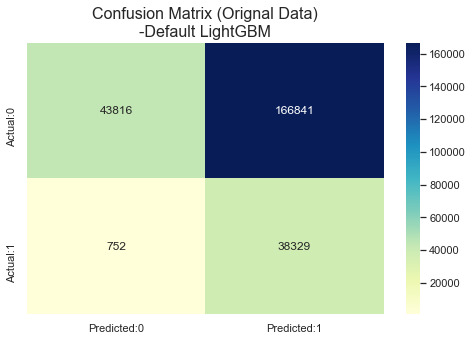

In [38]:
# threshold
y_pred_bi=y_pred.copy()
threshold=0.15
y_pred_bi[y_pred>threshold]=1
y_pred_bi[y_pred_bi!=1]=0

from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_bi))


from sklearn.metrics import multilabel_confusion_matrix
sns.set(font_scale = 1)
confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred_bi,
                           labels=[1])

conf_matrix = pd.DataFrame(data=confmat[0],
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix (Orignal Data)\n-Default LightGBM", fontsize=16)
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.21      0.35    491608
           1       0.19      0.98      0.31     91112

    accuracy                           0.33    582720
   macro avg       0.59      0.60      0.33    582720
weighted avg       0.86      0.33      0.34    582720



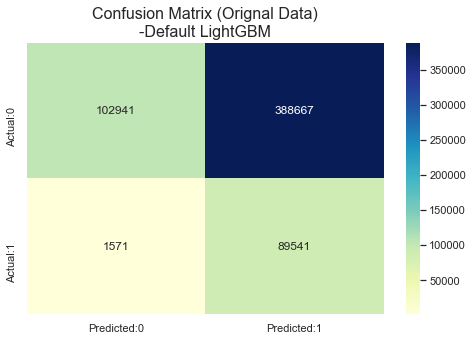

In [39]:
y_pred_train_bi=y_pred_train.copy()
threshold=0.15
y_pred_train_bi[y_pred_train<threshold]=0
y_pred_train_bi[y_pred_train_bi!=0]=1

from sklearn import metrics
print(metrics.classification_report(y_train,y_pred_train_bi))


from sklearn.metrics import multilabel_confusion_matrix
sns.set(font_scale = 1)
confmat = multilabel_confusion_matrix(y_true=y_train, y_pred=y_pred_train_bi,
                           labels=[1])

conf_matrix = pd.DataFrame(data=confmat[0],
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix (Orignal Data)\n-Default LightGBM", fontsize=16)
plt.show()

## Feature importance

In [40]:
gbm.feature_importance()

array([  30,  183, 1789,  577,  289,  234,   32,  214, 1554,   79,  421,
        997,  878,  197,  429,  337,  770,  341,  201,  208,  164,   94,
        129,  218,  497,  786,    4, 1862,   43,  438,  513,  293,  640,
        663,  806,   35,  760,  221,  503,  176,  664,  178,  490,  414,
        107,   21,  843,  666, 4670, 3342])

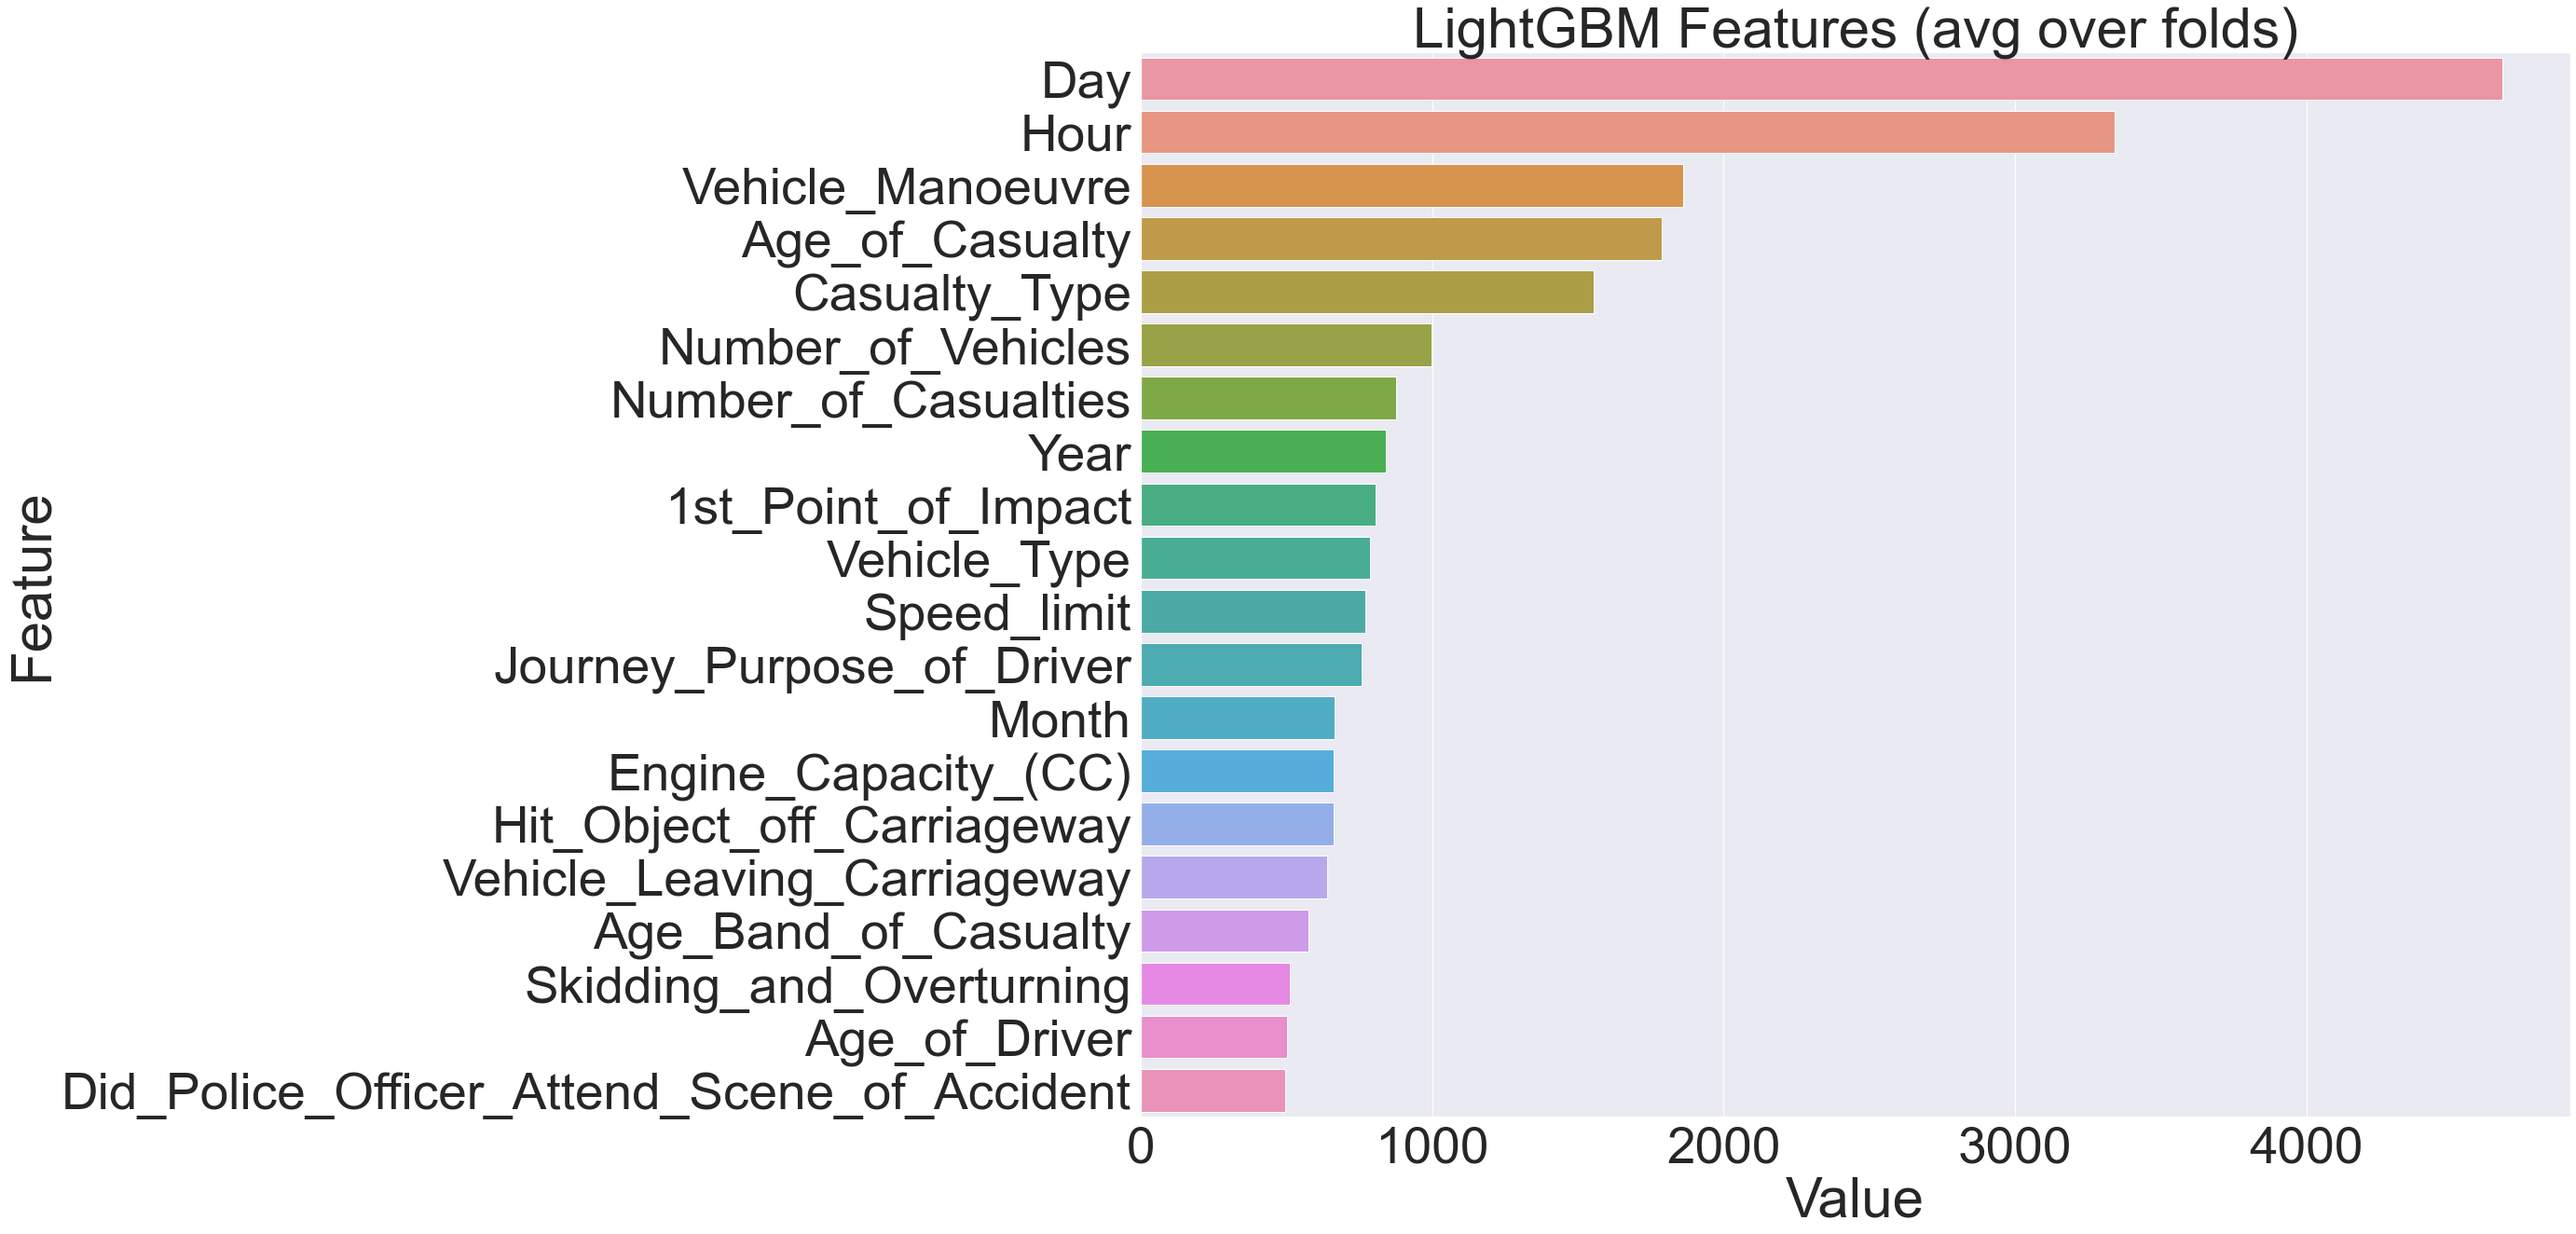

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
plotImp(gbm, X=X , num = 20)

# Binary Classification -- Fatal or not?

In [42]:
seriously_injured=accident[accident['Casualty_Severity'] != 3]
seriously_injured['fatal']=0
seriously_injured.loc[seriously_injured['Casualty_Severity'] == 1, 'fatal'] = 1
seriously_injured['fatal'].value_counts()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0    121366
1      8827
Name: fatal, dtype: int64

In [43]:
X=seriously_injured.drop(['Casualty_Severity','Accident_Severity','fatal'],axis=1)
y=seriously_injured.fatal
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.30, random_state=710)

In [44]:
seriously_injured.columns

Index(['Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Casualty_Type', 'Casualty_Home_Area_Type', 'Casualty_IMD_Decile',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', '1st_Road_Class', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Carriageway_Hazards', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
     

In [45]:
#Speed_limit,Age(two kinds), Engine_Capacity_(CC),Age_of_Vehicle
categorical_feature = ['Sex_of_Casualty','Age_Band_of_Casualty','Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger',
       'Bus_or_Coach_Passenger', 'Casualty_Type', 'Casualty_Home_Area_Type','Casualty_IMD_Decile', 'Police_Force','Number_of_Vehicles', 
       'Day_of_Week','1st_Road_Class', 'Road_Type', 'Junction_Detail','Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','Vehicle_Type', 
       'Towing_and_Articulation', 'Vehicle_Manoeuvre','Vehicle_Location-Restricted_Lane', 'Junction_Location','Skidding_and_Overturning', 
       'Hit_Object_in_Carriageway','Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway','1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_Band_of_Driver', 'Propulsion_Code',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type','Vehicle_IMD_Decile', 'Year', 'Month', 'Day', 'Day_of_year','Hour', 'Minute_of_day']

lgb_train = lgb.Dataset(X_train, y_train,categorical_feature= categorical_feature)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train,categorical_feature= categorical_feature)

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'binary',  # 目标函数 'binary'  'cross_entropy'
    'metric': {'l2','auc'},  # 评估函数['l2', 'auc','binary_logloss']
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.01,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1,  
#    'scale_pos_weight':20,
#     'is_unbalance': 'true',   
}# 385494/80545   80545/385494

# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=lgb_eval, early_stopping_rounds=5)

# 模型预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_train=gbm.predict(X_train, num_iteration=gbm.best_iteration)

# 模型评估
print('The rmse of prediction is:', MSE(y_test, y_pred) ** 0.5)
print('The rmse of train_X prediction is:', MSE(y_train, y_pred_train) ** 0.5)

C:\Users\admin\anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


TypeError: Wrong type(str) or unknown name(Police_Force) in categorical_feature

In [ ]:
# threshold
y_pred_bi=y_pred.copy()
threshold=0.07
y_pred_bi[y_pred>threshold]=1
y_pred_bi[y_pred_bi!=1]=0

from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_bi))


from sklearn.metrics import multilabel_confusion_matrix
sns.set(font_scale = 1)
confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred_bi,labels=[1])

conf_matrix = pd.DataFrame(data=confmat[0],
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix (Orignal Data)\n-Default LightGBM", fontsize=16)
plt.show()

In [ ]:
y_pred_train_bi=y_pred_train.copy()
threshold=0.5
y_pred_train_bi[y_pred_train>threshold]=1
y_pred_train_bi[y_pred_train_bi!=1]=0

from sklearn import metrics
print(metrics.classification_report(y_train,y_pred_train_bi))

from sklearn.metrics import multilabel_confusion_matrix
sns.set(font_scale = 1)
confmat = multilabel_confusion_matrix(y_true=y_train, y_pred=y_pred_train_bi,
                           labels=[1])

conf_matrix = pd.DataFrame(data=confmat[0],
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix (Orignal Data)\n-Default LightGBM", fontsize=16)
plt.show()

In [ ]:
# def BalanceCascade(X_train, y_train, X_test, num):
#     negnum = y_train[y_train == 0].shape[0]
#     posnum = y_train[y_train == 1].shape[0]
#     neg_index = np.argwhere(y_train == 0).reshape(negnum, )
#     pos_index = np.argwhere(y_train == 1).reshape(posnum, )
#     pos_train = X_train[pos_index, :]
    
#     FP = pow(posnum/negnum, 1/(num-1))
#     classifiers = {}; thresholds = {}; test_prob = np.empty((X_test.shape[0], num))
#     for i in range(num):
#         classifiers[i] = AdaBoostClassifier()
#         neg_train_index = np.random.permutation(neg_index)[:posnum]
#         neg_train = X_train[neg_train_index, :]
#         cur_X_train = np.r_[pos_train, neg_train]
#         cur_y_train = np.r_[y_train[pos_index], y_train[neg_train_index]]
#         classifiers[i].fit(cur_X_train, cur_y_train)
#         predict_result = classifiers[i].predict_proba(X_train[neg_index, :])[:,-1]
#         thresholds[i] = np.sort(predict_result)[int(neg_index.shape[0]*(1-FP))] - 0.5
#         neg_index = np.argwhere(predict_result >= (thresholds[i] + 0.5)).reshape(-1, )
#         test_prob[:,i] = classifiers[i].predict_proba(X_test)[:,-1] + thresholds[i]
#         print("No.{} Classifier Training Finished".format(i))
#     test_prob_result = np.average(test_prob, axis=1)
#     return test_prob_result

In [ ]:
# import numpy as np
# from sklearn.ensemble import AdaBoostClassifier
# import pandas as pd




# y_result = BalanceCascade(X_train, y_train, X_test, 10)
# y_result = np.c_[y_test, y_result]
# Gmeans = []; F_1 = []
# for i in np.linspace(y_result[:,1].min(), y_result[:,1].max(), 30):
#     Gmeans.append(Gmean(y_result, i)[0])
#     F_1.append(Gmean(y_result, i)[1])

# EasyEnsemble

In [ ]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score


def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    sns.set(font_scale = 1)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [ ]:
rf = RandomForestClassifier(n_estimators=50, random_state=0)
brf = BalancedRandomForestClassifier(n_estimators=50, random_state=0)

rf.fit(X_train, y_train)
brf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_brf = brf.predict(X_test)

# Similarly to the previous experiment, the balanced classifier outperform the
# classifier which learn from imbalanced bootstrap samples. In addition, random
# forest outsperforms the bagging classifier.

print('Random Forest classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_rf),
              geometric_mean_score(y_test, y_pred_rf)))
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_rf, classes=np.unique(y), ax=ax[0],
                      title='Random forest')

print('Balanced Random Forest classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_brf),
              geometric_mean_score(y_test, y_pred_brf)))
cm_brf = confusion_matrix(y_test, y_pred_brf)
plot_confusion_matrix(cm_brf, classes=np.unique(y), ax=ax[1],
                      title='Balanced random forest')

In [ ]:
# base_estimator = AdaBoostClassifier(n_estimators=10)
base_estimator =LGBMClassifier(n_estimators=100)
eec = EasyEnsembleClassifier(n_estimators=10,
                             base_estimator=base_estimator)
eec.fit(X_train, y_train)
y_pred_eec = eec.predict(X_test)
print('Easy ensemble classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_eec),
              geometric_mean_score(y_test, y_pred_eec)))
cm_eec = confusion_matrix(y_test, y_pred_eec)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_eec, classes=np.unique(y), ax=ax[0],
                      title='Easy ensemble classifier')

rusboost = RUSBoostClassifier(n_estimators=10,
                              base_estimator=base_estimator)
rusboost.fit(X_train, y_train)
y_pred_rusboost = rusboost.predict(X_test)
print('RUSBoost classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_rusboost),
              geometric_mean_score(y_test, y_pred_rusboost)))
cm_rusboost = confusion_matrix(y_test, y_pred_rusboost)
plot_confusion_matrix(cm_rusboost, classes=np.unique(y),
                      ax=ax[1], title='RUSBoost classifier')

plt.show()

In [ ]:
for i in eec.estimators_:
    print (i,'==============')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
plotImp(eec, X=X , num = 20)

# one-hot

In [5]:
accident_onehot=pd.read_csv('D:/Thesis/UK/UK/UK_2015-2019_one-hot.csv',index_col=0,dtype='int16')

#severe or slight
accident_onehot['Serious_Fatal'] = 0
accident_onehot.loc[accident_onehot['Casualty_Severity'] < 3, 'Serious_Fatal'] = 1
print(accident_onehot['Serious_Fatal'].value_counts())

#fatal or not
accident_onehot['Fatal'] = 0
accident_onehot.loc[accident_onehot['Casualty_Severity'] == 1, 'Fatal'] = 1
print(accident_onehot['Fatal'].value_counts())

accident_onehot=accident_onehot.drop(['Casualty_Severity','Accident_Severity'],axis=1)

train_set, test_set = train_test_split(accident_onehot, test_size=0.3, random_state=710)

train_severe=train_set[train_set['Serious_Fatal']==1]
train_slight=train_set[train_set['Serious_Fatal']==0]
train_fatal=train_set[train_set['Fatal']==1]
train_alive=train_set[train_set['Fatal']==0]
X_train=train_set.drop(['Serious_Fatal','Fatal'],axis=1)
y_train=train_set['Serious_Fatal']
X_test=test_set.drop(['Serious_Fatal','Fatal'],axis=1)
y_test=test_set['Serious_Fatal']
import gc
gc.collect()

0    702265
1    130193
Name: Serious_Fatal, dtype: int64
0    823631
1      8827
Name: Fatal, dtype: int64


18

In [6]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'binary',  # 目标函数 'binary'  'cross_entropy'
    'metric': 'auc',  # 评估函数['l2', 'auc','binary_logloss']
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.01,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1,  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
#    'scale_pos_weight':10,
#     'is_unbalance': 'true',   
}# 385494/80545   80545/385494

# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=5000, valid_sets=lgb_eval, early_stopping_rounds=5)

# 模型预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_train=gbm.predict(X_train, num_iteration=gbm.best_iteration)

[LightGBM] [Info] Number of positive: 91112, number of negative: 491608
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.149343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 582720, number of used features: 404
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.156356 -> initscore=-1.685592
[LightGBM] [Info] Start training from score -1.685592
[1]	valid_0's auc: 0.728932
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.737274
[3]	valid_0's auc: 0.737377
[4]	valid_0's auc: 0.740844
[5]	valid_0's auc: 0.740477
[6]	valid_0's auc: 0.740451
[7]	valid_0's auc: 0.739825
[8]	valid_0's auc: 0.740226
[9]	valid_0's auc: 0.740104
Early stopping, best iteration is:
[4]	valid_0's auc: 0.740844


In [7]:
def plot_report_and_matrix(threshold=0.5,y_pred=y_pred, y_real=y_test):
    # threshold
    y_pred_bi=y_pred.copy()
    threshold=0.5
    y_pred_bi[y_pred>threshold]=1
    y_pred_bi[y_pred_bi!=1]=0

    from sklearn import metrics
    print(metrics.classification_report(y_real,y_pred_bi))


    from sklearn.metrics import multilabel_confusion_matrix
    sns.set(font_scale = 1)
    confmat = multilabel_confusion_matrix(y_true=y_real, y_pred=y_pred_bi,
                           labels=[1])

    conf_matrix = pd.DataFrame(data=confmat[0],
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix\n-Default LightGBM", fontsize=16)
    plt.show()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.92    210657
           1       0.00      0.00      0.00     39081

    accuracy                           0.84    249738
   macro avg       0.42      0.50      0.46    249738
weighted avg       0.71      0.84      0.77    249738



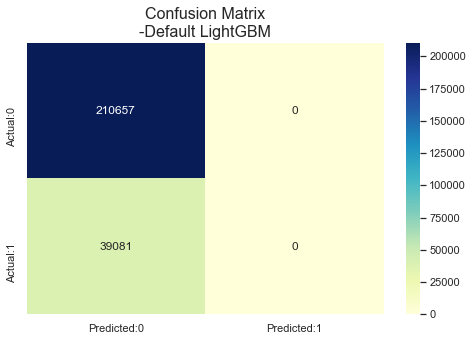

In [8]:
plot_report_and_matrix()

              precision    recall  f1-score   support

           0       0.84      1.00      0.92    491608
           1       0.00      0.00      0.00     91112

    accuracy                           0.84    582720
   macro avg       0.42      0.50      0.46    582720
weighted avg       0.71      0.84      0.77    582720



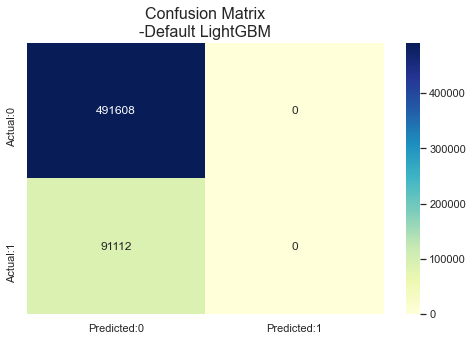

In [9]:
plot_report_and_matrix(y_pred=y_pred_train,y_real=y_train)